In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str  

In [3]:
def first_node(state: AgentState) -> AgentState:
   state['final'] = f"Hello, {state['name']}! "
   return state

def second_node(state: AgentState) -> AgentState:
   state['final'] += f"You are {state['age']} years old."
   return state

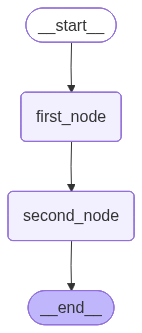

In [4]:
graph = StateGraph(AgentState)
graph.add_node(first_node)
graph.add_node(second_node)
graph.add_edge('first_node', 'second_node')
graph.set_entry_point('first_node')
graph.set_finish_point('second_node')

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({
    'name': "Alice",
    'age': 30
})

print(result['final'])

Hello, Alice! You are 30 years old.
